In [1]:
# Importing the required libraries
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading content from the text file
with open('YouTubeTrailerComments.txt', 'r') as file:
    review_data = file.read()

In [3]:
review_data[:2000]

'MovieID::::1\nI was looking for halloween themed movies and stumbled over this... is there anything halloween related in this film?\n\n\nSeen it years ago but can\'t remember squat\nwelp, been 3 years since anybody have commented\nWell, there was supposed to be another sequel. From what I heard, the two guys go to Italy (to meet their new relatives, I suppose) & wind up meeting Italian versions of themselves.\ni loved the first one is it like the first one or not??\n128238 170 7 0 7\nThe more things change, the more they stay the same in Wabasha, Minnesota. The uncatchable fish named Catfish Hunter grows fatter. The wisecracks, zingers and put downs pile up like freshly raked leaves. And GRUMPY OLD MEN become grumpier in the sequel that\'s "pure delight, a wonderfully warmhearted comedy" (David Sheehan, CBS-TV). Grabbing fishing rods and picking up where they left off, JACK LEMMON and WALTER MATTHAU reel in another comedy winner as GRUMPIER OLD MEN. ANN-MARGRET, DARYL HANNAH, KEVIN PO

In [4]:
# Extracting Movie Id and respective details
movie_entries = re.findall(r'MovieID::::(\d+).*?(\d+\s+\d+\s+\d+\s+\d+\s+\d+)', review_data, re.DOTALL)


In [5]:
def convert_to_int(value):
    try:
        return int(value)
    except ValueError:
        return None

columns = ['MovieID', 'Views', 'Likes', 'Dislikes', 'Forward/Share', 'Comments']

rows = []
for movie_id, stats in movie_entries:
    row = [movie_id] + stats.split()
    if len(row) == len(columns):
        converted_row = [convert_to_int(value) for value in row]
        if all(value is not None for value in converted_row):
            rows.append(converted_row)

df = pd.DataFrame(rows, columns=columns)

In [6]:
df.head()

,MovieID,Views,Likes,Dislikes,Forward/Share,Comments
0,1,128238,170,7,0,7
1,2,7,155561,135,14,0
2,3,2532,7,2,0,1
3,4,6827,9,1,0,0
4,5,330807,374,16,0,121


In [7]:
df.sort_values("Views", ascending = False).head(3)

,MovieID,Views,Likes,Dislikes,Forward/Share,Comments
886,902,33333333333,6034,10,0,0
691,703,3028645,1932,749,0,156
539,547,2870023,4019,232,0,1602


In [8]:
df.sort_values("Views", ascending = True).head(10)

,MovieID,Views,Likes,Dislikes,Forward/Share,Comments
974,990,0,3115,17,2,0
399,406,1,88777,206,10,0
203,206,2,18186,45,1,0
753,765,3,8110,33,4,0
52,53,3,23046,44,2,0
959,975,3,64044,115,15,0
591,599,3,365487,223,25,0
840,854,3,23988,165,2,0
831,845,5,256761,396,30,0
1,2,7,155561,135,14,0


# The above is a typical example of an outlier as views 33333333333 looks like an anomaly and also no movie with 0 views can have 3115 likes unless this website is more famous for just rating the movie more than viewing.

In [9]:
df.sort_values("Likes", ascending = False).head(5)

,MovieID,Views,Likes,Dislikes,Forward/Share,Comments
591,599,3,365487,223,25,0
831,845,5,256761,396,30,0
978,995,2002,252661,1080,32,0
1,2,7,155561,135,14,0
458,466,18,134909,161,18,0


# Top 5 movies as per likes are movieid: 591, 831, 978, 1 and 458. Even though it looks quite odd to not have a single comment dispite being the most liked movie.

In [10]:
df.sort_values("Comments", ascending = False).head(5)

,MovieID,Views,Likes,Dislikes,Forward/Share,Comments
539,547,2870023,4019,232,0,1602
433,440,1764003,2169,76,0,912
485,493,1275443,1975,61,0,807
451,459,1247459,2460,94,0,782
620,628,306719,2157,68,0,541


# Movies with most comments have gained the most engagement in terms of view, likes and dislikes all combined.

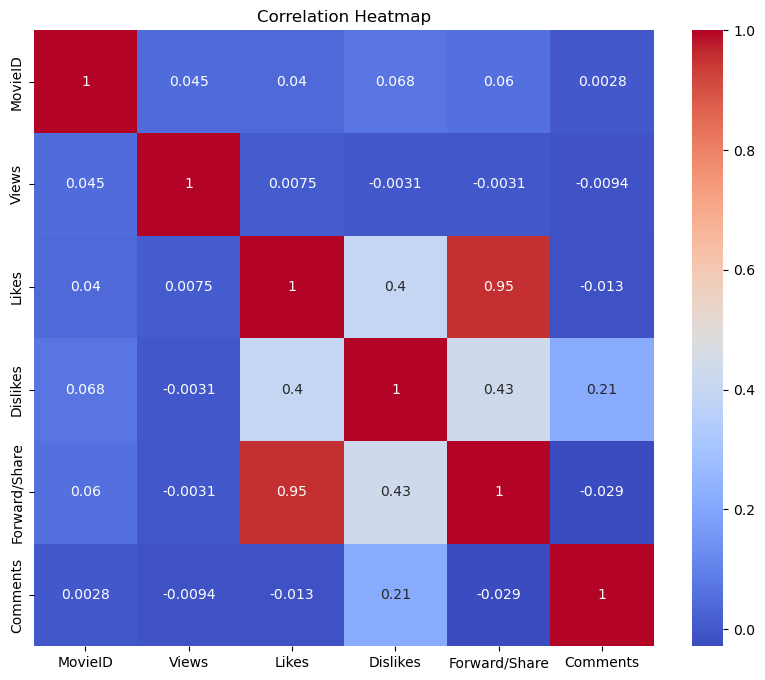

In [11]:
# Heatmap to find correlation
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Likes are highly correlated with Forward/Share which is quite intuitive that people tend to share movies that they like

# Dislikes are negatively correlated with Views therefore, more dislikes and negative reviews means less views

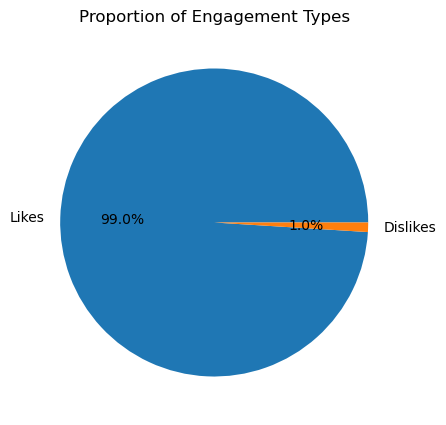

In [12]:
engagement_sum = df[['Likes', 'Dislikes']].sum()
plt.figure(figsize=(5, 5))
plt.pie(engagement_sum, labels=engagement_sum.index, autopct='%1.1f%%')
plt.title('Proportion of Engagement Types')
plt.show()

# Across all the moview reviews, majorly movies had more likes compared to dislikes.

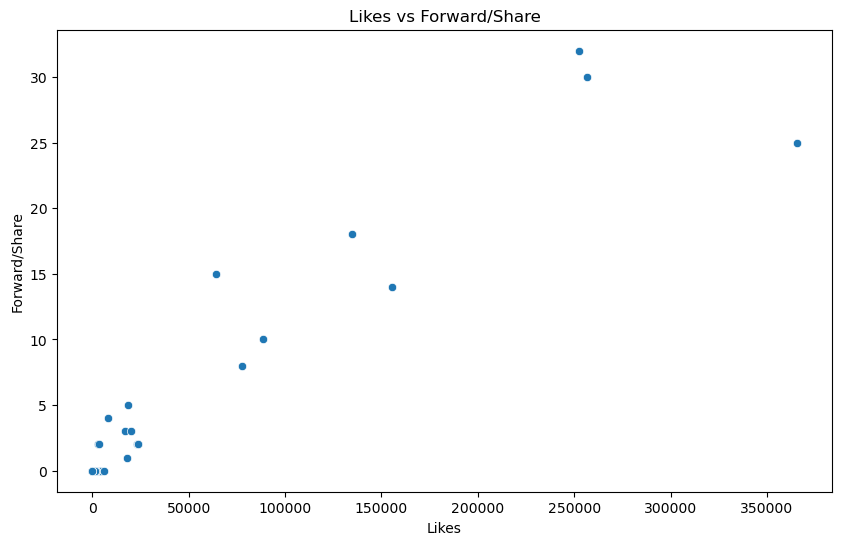

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Likes', y='Forward/Share', data=df)
plt.title('Likes vs Forward/Share')
plt.show()

# The above scatterplot shows, more the likes, more the moview was Forwarded or Shared.

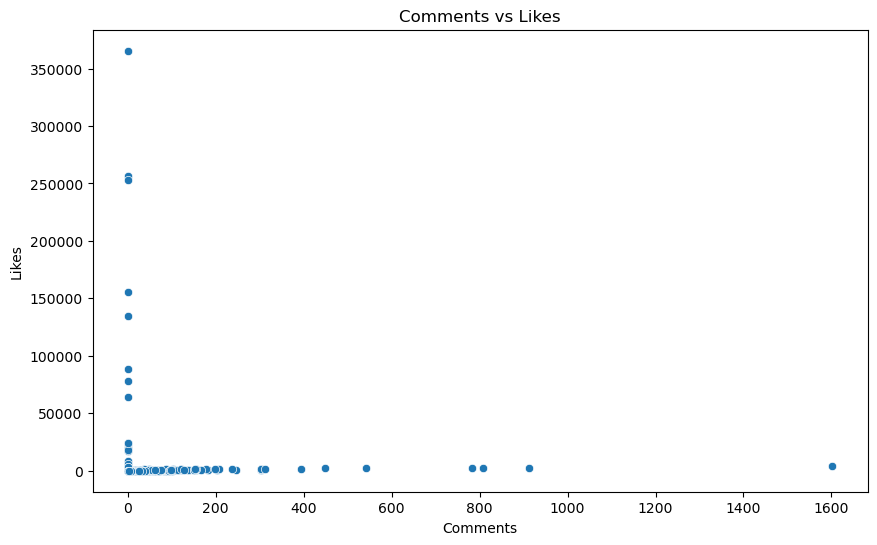

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Comments', y='Likes', data=df)
plt.title('Comments vs Likes')
plt.show()

# Likes and Comments show an inversely proportional behaviour towards each other. More the Likes, less people want to express their liking through the comments.